In [65]:
import sklearn                  # Алгоритмы машинного обучения
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt  # Научная графика
%matplotlib inline

# Описание задачи

Таблица содержит объявления о продаже автомобилей за 2021 год. Необходимо, по значениям признаков узнать тип машины.

# Чтение данных

In [ ]:
data_raw = pd.read_csv("Car_sale_ads.csv")
data_raw.index

RangeIndex(start=0, stop=208304, step=1)

In [ ]:
data_raw.columns

Index(['Index', 'Price', 'Currency', 'Condition', 'Vehicle_brand',
       'Vehicle_model', 'Vehicle_version', 'Vehicle_generation',
       'Production_year', 'Mileage_km', 'Power_HP', 'Displacement_cm3',
       'Fuel_type', 'CO2_emissions', 'Drive', 'Transmission', 'Type',
       'Doors_number', 'Colour', 'Origin_country', 'First_owner',
       'First_registration_date', 'Offer_publication_date', 'Offer_location',
       'Features'],
      dtype='object')

In [ ]:
data_raw

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,208299,39900,PLN,Used,Żuk,Other,NaN,NaN,2014,40000.0,...,Manual,small_cars,1.0,other,NaN,NaN,NaN,30/04/2021,"ul. Huzarska 12 - 47-400 Racibórz, raciborski,...",[]
208300,208300,10900,PLN,Used,Żuk,Other,NaN,NaN,1970,63518.0,...,Manual,station_wagon,4.0,other,Poland,NaN,NaN,02/05/2021,"Włocławek, Kujawsko-pomorskie",[]
208301,208301,6900,PLN,Used,Żuk,Other,NaN,NaN,1977,11880.0,...,Manual,SUV,3.0,red,NaN,NaN,11/06/1977,28/04/2021,"Złotów, złotowski, Wielkopolskie",[]
208302,208302,5700,PLN,Used,Żuk,Other,NaN,NaN,1986,100000.0,...,Manual,minivan,2.0,blue,NaN,NaN,NaN,24/04/2021,"Kraczkowa, łańcucki, Podkarpackie",[]


# Частично произведем обработку данных и выделим категориальные признаки

In [ ]:
data = data_raw.copy()
data.dtypes

Index                        int64
Price                        int64
Currency                    object
Condition                   object
Vehicle_brand               object
Vehicle_model               object
Vehicle_version             object
Vehicle_generation          object
Production_year              int64
Mileage_km                 float64
Power_HP                   float64
Displacement_cm3           float64
Fuel_type                   object
CO2_emissions              float64
Drive                       object
Transmission                object
Type                        object
Doors_number               float64
Colour                      object
Origin_country              object
First_owner                 object
First_registration_date     object
Offer_publication_date      object
Offer_location              object
Features                    object
dtype: object

In [ ]:
data['Condition'] = data['Condition'].astype('category')
data['Vehicle_brand'] = data['Vehicle_brand'].astype('category')
data['Fuel_type'] = data['Fuel_type'].astype('category')
data['Drive'] = data['Drive'].astype('category')
data['Transmission'] = data['Transmission'].astype('category')
data['Type'] = data['Type'].astype('category')
data['Colour'] = data['Colour'].astype('category')
data['Origin_country'] = data['Origin_country'].astype('category')

In [ ]:
data['First_registration_date'] = data['First_registration_date'].str[-4:]
data['First_registration_date'] = data['First_registration_date'].astype('float')
data['First_registration_date'].unique

<bound method Series.unique of 0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
208299       NaN
208300       NaN
208301    1977.0
208302       NaN
208303       NaN
Name: First_registration_date, Length: 208304, dtype: float64>

In [ ]:
del data['Features']
del data['Currency']
del data['Vehicle_model']
del data['Vehicle_version']
del data['Vehicle_generation']
del data['First_owner']
del data['Offer_location']
del data['Offer_publication_date']
del data['Origin_country']

# Обработка пропущенных значений

In [ ]:
data.isna().sum()

Index                           0
Price                           0
Condition                       0
Vehicle_brand                   0
Production_year                 0
Mileage_km                    983
Power_HP                      643
Displacement_cm3             1966
Fuel_type                       0
CO2_emissions              114257
Drive                       15076
Transmission                  479
Type                            0
Doors_number                 1487
Colour                          0
First_registration_date    121859
dtype: int64

Удалим строки, в которых содержится малое количество незаполненных значений

In [ ]:
data_na = data.copy()
data_na.drop_duplicates(subset='Index', inplace=True)
data_na.dropna(axis=0, how="all", subset=['Mileage_km'], inplace=True)
data_na.dropna(axis=0, how="all", subset=['Power_HP'], inplace=True)
data_na.dropna(axis=0, how="all", subset=['Displacement_cm3'], inplace=True)
data_na.dropna(axis=0, how="all", subset=['Drive'], inplace=True)
data_na.dropna(axis=0, how="all", subset=['Transmission'], inplace=True)
data_na.dropna(axis=0, how="all", subset=['Doors_number'], inplace=True)

In [ ]:
data_na.isna().sum()

Index                           0
Price                           0
Condition                       0
Vehicle_brand                   0
Production_year                 0
Mileage_km                      0
Power_HP                        0
Displacement_cm3                0
Fuel_type                       0
CO2_emissions               96295
Drive                           0
Transmission                    0
Type                            0
Doors_number                    0
Colour                          0
First_registration_date    107327
dtype: int64

# Избавляемся от выбросов

Для начала построим графики зависимостей, чтобы оценить количество выбросов

Text(0, 0.5, 'Condition')

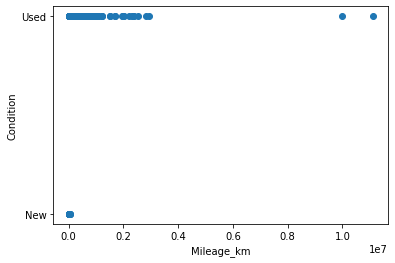

In [ ]:
plt.scatter(data_na['Mileage_km'], data_na['Condition'])
plt.xlabel('Mileage_km')
plt.ylabel('Condition')

Text(0, 0.5, 'Vehicle_brand')

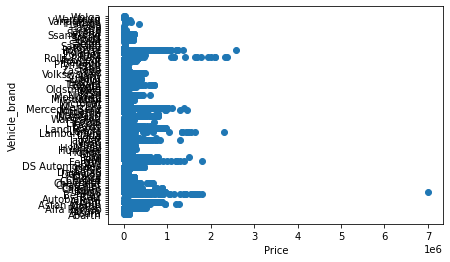

In [ ]:
plt.scatter(data_na['Price'], data_na['Vehicle_brand'])
plt.xlabel('Price')
plt.ylabel('Vehicle_brand')

Text(0, 0.5, 'Mileage_km')

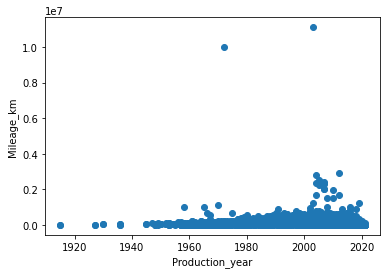

In [ ]:
plt.scatter(data_na['Production_year'], data_na['Mileage_km'])
plt.xlabel('Production_year')
plt.ylabel('Mileage_km')

Text(0, 0.5, 'CO2_emissions')

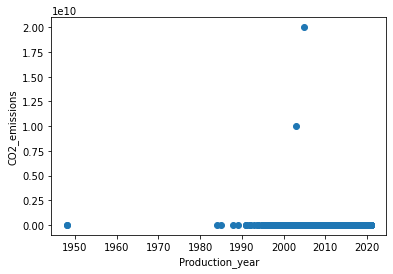

In [ ]:
plt.scatter(data_na['Production_year'], data_na['CO2_emissions'])
plt.xlabel('Production_year')
plt.ylabel('CO2_emissions')

Text(0, 0.5, 'First_registration_date')

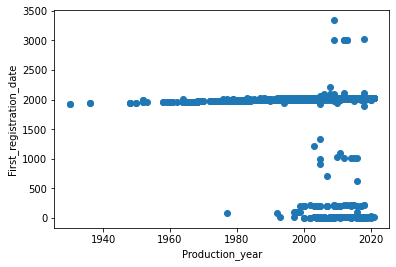

In [ ]:
plt.scatter(data_na['Production_year'], data_na['First_registration_date'])
plt.xlabel('Production_year')
plt.ylabel('First_registration_date')

Text(0, 0.5, 'Type')

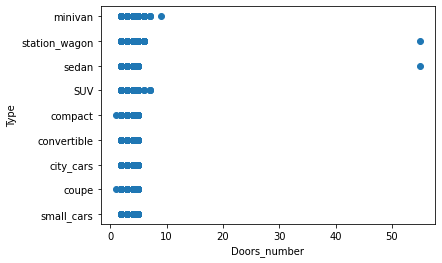

In [ ]:
plt.scatter(data_na['Doors_number'], data_na['Type'])
plt.xlabel('Doors_number')
plt.ylabel('Type')

Text(0, 0.5, 'Power_HP')

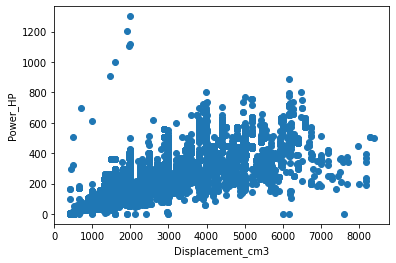

In [ ]:
plt.scatter(data_na['Displacement_cm3'], data_na['Power_HP'])
plt.xlabel('Displacement_cm3')
plt.ylabel('Power_HP')

In [ ]:
data_na['Price'].quantile([.05,.1,.2,.3,.4,.50,.70, .90, .95, 1])

0.05       6950.0
0.10       9900.0
0.20      15600.0
0.30      20900.0
0.40      27800.0
0.50      36500.0
0.70      65900.0
0.90     142800.0
0.95     199900.0
1.00    6999000.0
Name: Price, dtype: float64

In [ ]:
data_na['Mileage_km'].quantile([.005,.1,.2,.3,.4,.50,.70, .8, .90, .95, .96, .98, 1])

0.005           1.0
0.100           9.0
0.200       29000.0
0.300       74000.0
0.400      112000.0
0.500      143000.0
0.700      192000.0
0.800      220000.0
0.900      259000.0
0.950      292484.6
0.960      301000.0
0.980      335000.0
1.000    11111111.0
Name: Mileage_km, dtype: float64

In [ ]:
data_na['Doors_number'].quantile([.05,.1,.2,.3,.4,.50,.70, .90, .95, .98, 1])

0.05     3.0
0.10     4.0
0.20     4.0
0.30     5.0
0.40     5.0
0.50     5.0
0.70     5.0
0.90     5.0
0.95     5.0
0.98     5.0
1.00    55.0
Name: Doors_number, dtype: float64

In [ ]:
data_na['CO2_emissions'].quantile([.05,.1,.2,.3,.4,.50,.70, .90, .95, .98, 1])

0.05    9.900000e+01
0.10    1.070000e+02
0.20    1.170000e+02
0.30    1.240000e+02
0.40    1.340000e+02
0.50    1.400000e+02
0.70    1.580000e+02
0.90    1.940000e+02
0.95    2.220000e+02
0.98    2.600000e+02
1.00    2.000000e+10
Name: CO2_emissions, dtype: float64

Избавимся от строк с большими: ценой, пробегом, количеством дверей и выбросами CO2. Также удалим столбец с датой первой регистрации, т.к. имеется много некорректных данных.

In [ ]:
rows_to_drop = data_na[
    (data_na['Price'] > data_na['Price'].quantile(0.995)) | (data_na['Mileage_km'] > 100) & (data_na['Condition'] == "New") | 
    (data_na['Mileage_km'] > data_na['Mileage_km'].quantile(0.995)) | 
    (data_na['Doors_number'] > data_na['Doors_number'].quantile(0.995)) | 
    (data_na['CO2_emissions'] > data_na['CO2_emissions'].quantile(0.995))].index
data_na = data_na.drop(rows_to_drop)

In [ ]:
del data_na['First_registration_date']
data_na.shape

(186687, 15)

После избавления от выбросов можем заполнить некоторые пропущенные значения средним.

In [ ]:
data_na.isna().sum()

Index                   0
Price                   0
Condition               0
Vehicle_brand           0
Production_year         0
Mileage_km              0
Power_HP                0
Displacement_cm3        0
Fuel_type               0
CO2_emissions       94659
Drive                   0
Transmission            0
Type                    0
Doors_number            0
Colour                  0
dtype: int64

Т. к. пропущенных значений все так же много, то заполним их при помощи медианны.

In [ ]:
col = ["CO2_emissions"]
data_na.fillna(data_na[col].median(axis = 0), axis=0 , inplace=True)
data_na.isna().sum()

Index               0
Price               0
Condition           0
Vehicle_brand       0
Production_year     0
Mileage_km          0
Power_HP            0
Displacement_cm3    0
Fuel_type           0
CO2_emissions       0
Drive               0
Transmission        0
Type                0
Doors_number        0
Colour              0
dtype: int64

# Визуализация

In [ ]:
data_na.describe()

,Index,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,CO2_emissions,Doors_number
count,186687.000000,186687.000000,186687.000000,186687.000000,186687.000000,186687.000000,186687.000000,186687.000000
mean,104437.296170,59450.762474,2012.313193,136652.499869,149.624789,1860.719161,142.049275,4.651143
std,60216.810285,66312.386442,6.457508,93632.191945,70.400618,685.316035,26.350936,0.734477
min,0.000000,500.000000,1915.000000,1.000000,1.000000,400.000000,1.000000,1.000000
25%,52464.000000,17900.000000,2008.000000,54000.000000,105.000000,1461.000000,139.000000,5.000000
50%,104440.000000,35900.000000,2013.000000,143745.000000,136.000000,1798.000000,139.000000,5.000000
75%,157133.500000,75030.000000,2017.000000,204000.000000,170.000000,1997.000000,139.000000,5.000000
max,208300.000000,519900.000000,2021.000000,400000.000000,1300.000000,8400.000000,313.000000,5.000000


In [ ]:
data_na.describe(include=['category'])

,Condition,Vehicle_brand,Fuel_type,Drive,Transmission,Type,Colour
count,186687,186687,186687,186687,186687,186687,186687
unique,2,102,6,5,2,9,14
top,Used,Volkswagen,Gasoline,Front wheels,Manual,SUV,black
freq,164909,16438,89678,136831,120771,37767,45396


Построим график цены от пробега с учетом типа автомобиля

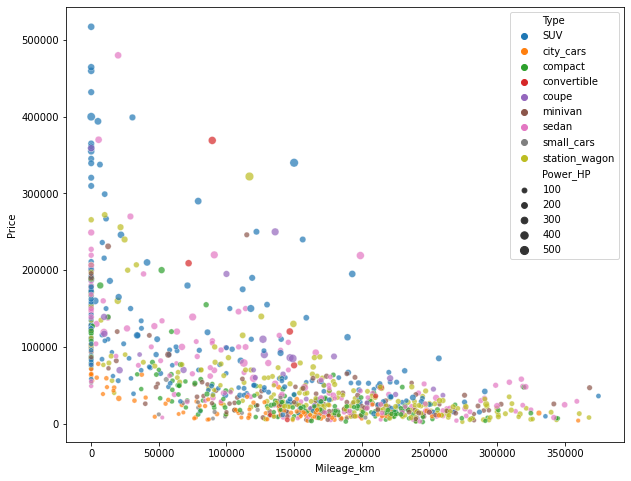

In [ ]:
random_subset = np.random.choice(np.arange(data_na.shape[0]), size=1000, replace=False)

plt.figure(figsize = (10, 8))
sns.scatterplot(x='Mileage_km', y='Price', hue='Type', size='Power_HP', data=data_na.iloc[random_subset], alpha=0.7, legend="auto")
plt.legend()

Построим все диаграммы рассеивания

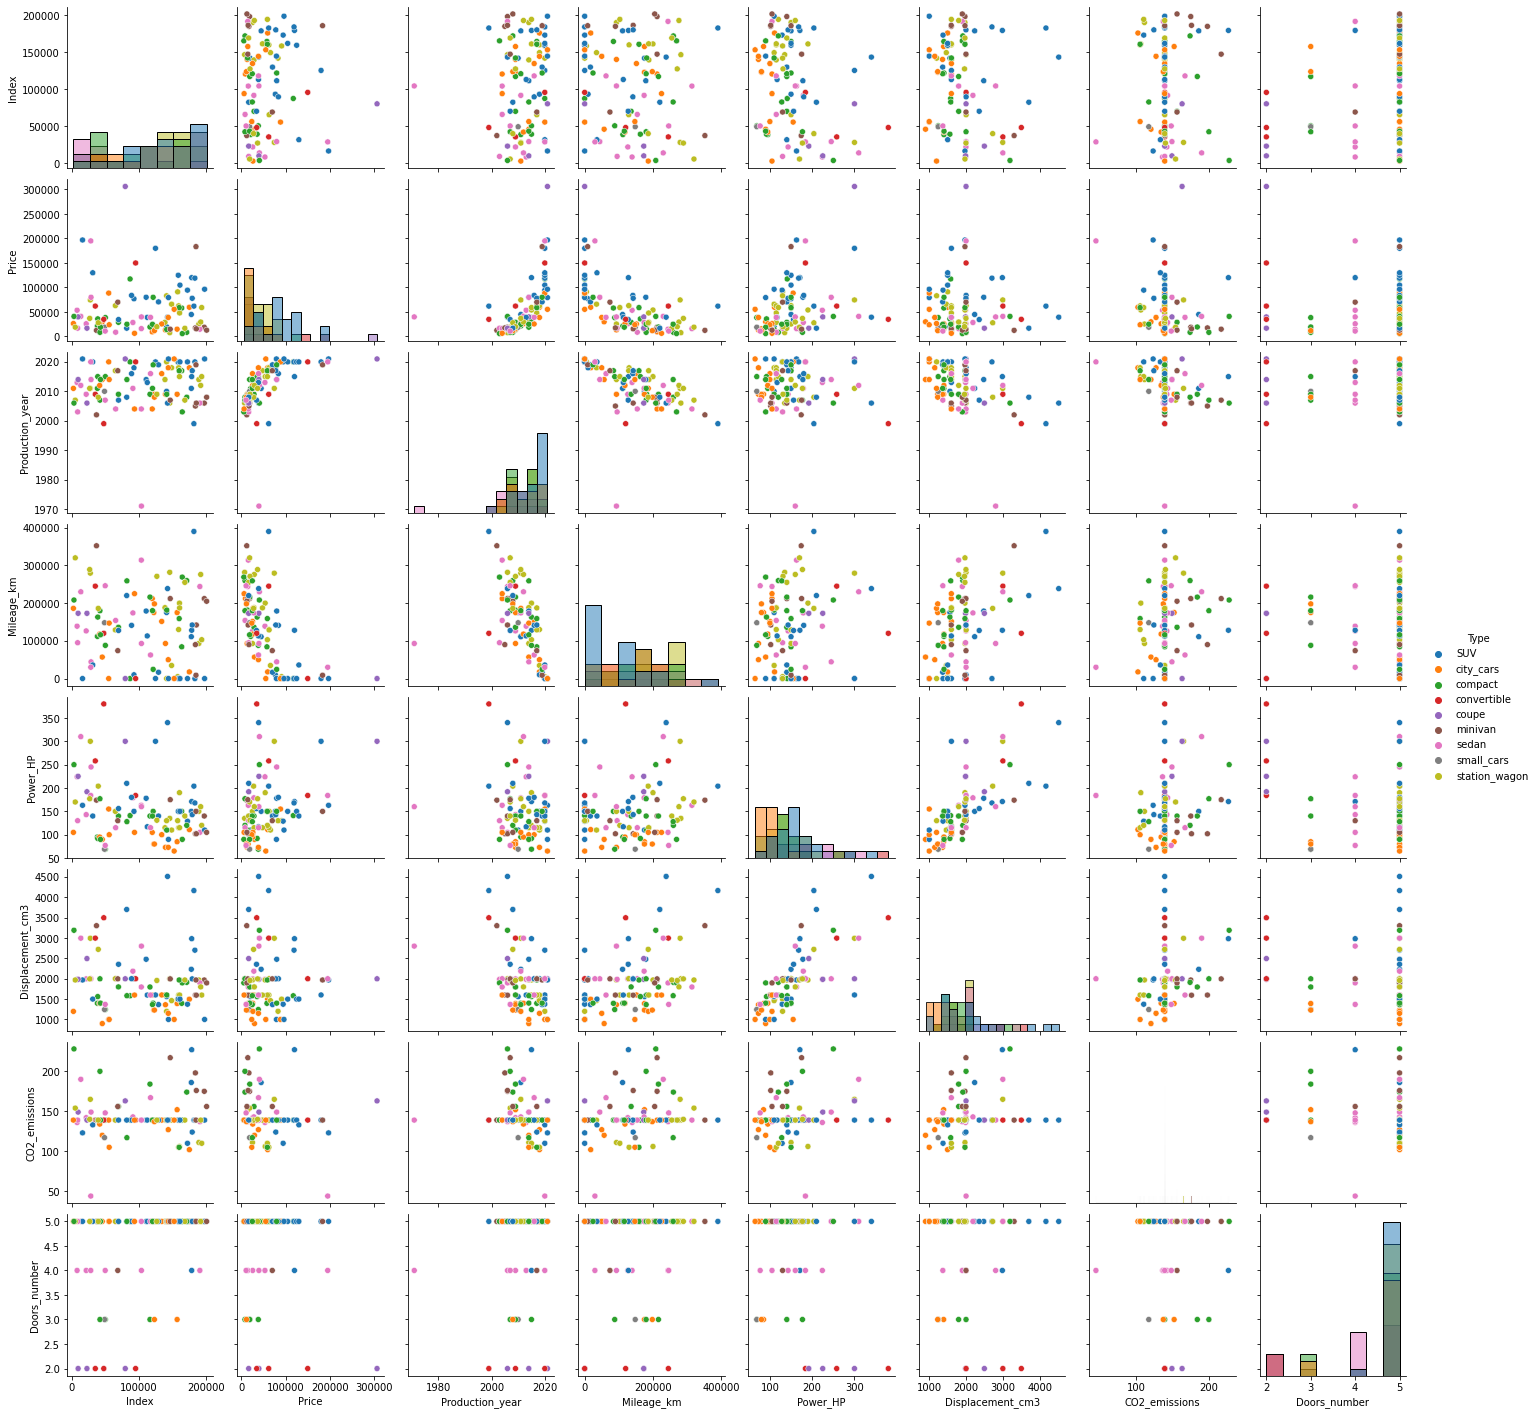

In [ ]:
random_subset = np.random.choice(np.arange(data_na.shape[0]), size=100, replace=False)
sns.pairplot(data_na.iloc[random_subset], hue='Type', diag_kind='hist')

Матрица корреляции

In [ ]:
data_na.corr()

,Index,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,CO2_emissions,Doors_number
Index,1.000000,-0.114212,0.028367,-0.024183,-0.240254,-0.209701,-0.071417,0.073538
Price,-0.114212,1.000000,0.558438,-0.575083,0.606865,0.317997,0.062506,0.005390
Production_year,0.028367,0.558438,1.000000,-0.676618,0.156971,-0.169433,-0.166841,0.246749
Mileage_km,-0.024183,-0.575083,-0.676618,1.000000,-0.103180,0.171832,0.145748,-0.042187
Power_HP,-0.240254,0.606865,0.156971,-0.103180,1.000000,0.809038,0.360205,-0.140229
Displacement_cm3,-0.209701,0.317997,-0.169433,0.171832,0.809038,1.000000,0.376537,-0.194337
CO2_emissions,-0.071417,0.062506,-0.166841,0.145748,0.360205,0.376537,1.000000,-0.095268
Doors_number,0.073538,0.005390,0.246749,-0.042187,-0.140229,-0.194337,-0.095268,1.000000


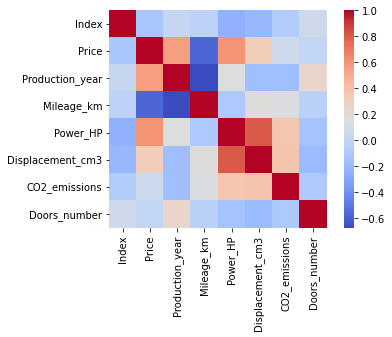

In [ ]:
sns.heatmap(data_na.corr(), square=True, cmap='coolwarm')

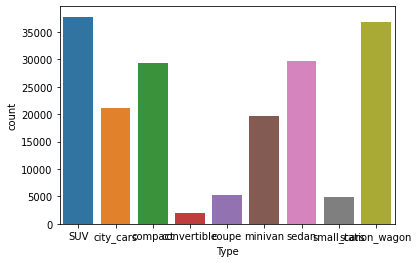

In [ ]:
sns.countplot(x='Type', data=data_na)

# Обработка категориальных признаков

In [ ]:
data_na['Vehicle_brand'].unique()

['Abarth', 'Acura', 'Aixam', 'Alfa Romeo', 'Alpine', ..., 'Tesla', 'Triumph', 'Vanderhall', 'Wartburg', 'Wołga']
Length: 102
Categories (108, object): ['Abarth', 'Acura', 'Aixam', 'Alfa Romeo', ..., 'Zaporożec', 'Zastava',
                           'Škoda', 'Żuk']

Слишком много категорий, лучше будет отказаться от данного признака.

In [ ]:
del data_na['Vehicle_brand']

К категориальным признакам 'Drive', 'Fuel_type', 'Colour' применим метод бинаризации.


In [ ]:
d1 = pd.get_dummies(data_na['Drive'])
d3 = pd.get_dummies(data_na['Colour'])
d6 = pd.get_dummies(data_na['Fuel_type'])

In [ ]:
data_na['Type'].unique()

['small_cars', 'coupe', 'city_cars', 'convertible', 'compact', 'SUV', 'sedan', 'station_wagon', 'minivan']
Categories (9, object): ['SUV', 'city_cars', 'compact', 'convertible', ..., 'minivan', 'sedan',
                         'small_cars', 'station_wagon']

In [ ]:
d2 = data_na['Type'].replace("small_cars",9).replace("coupe",1).replace("city_cars",
    2).replace("convertible",3).replace("compact",4).replace("SUV",5).replace("sedan",6).replace("station_wagon",
                                                                        7).replace("minivan",8)
d2.astype('int')

0         9
1         1
3         9
5         9
7         9
         ..
208284    6
208287    6
208294    4
208296    9
208300    7
Name: Type, Length: 186687, dtype: int64

Остальные признаки заменим на числовые

In [ ]:
data_na['Condition'] = pd.factorize(data_na['Condition'])[0]
data_na['Transmission'] = pd.factorize(data_na['Transmission'])[0]
d4 = data_na['Condition']
d5 = data_na['Transmission']
data_na = data_na.drop(['Type', 'Fuel_type', 'Drive', 'Colour', 'Condition', 'Transmission'], axis=1)

# Нормализация

Нормализация числовых признаков выполняется путем линейного преобразования диапазона каждого из значений к отрезку [0; 1].

In [ ]:
data_na = (data_na - data_na.min(axis=0)) / (data_na.max(axis=0) - data_na.min(axis=0))

In [ ]:
data_na_norm = pd.concat((data_na, d1, d3, d4, d5, d6, d2), axis=1)
data_na_norm

,Index,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,CO2_emissions,Doors_number,4x4 (attached automatically),4x4 (attached manually),...,Transmission,Diesel,Electric,Ethanol,Gasoline,Gasoline + CNG,Gasoline + LPG,Hybrid,Hydrogen,Type
0,0.000000,0.164998,1.000000,0.000000,0.110855,0.125000,0.442308,0.50,0,0,...,0,0,0,0,1,0,0,0,0,9
1,0.000005,0.082788,0.556604,0.147498,0.056967,0.087500,0.442308,0.25,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.000014,0.075857,0.915094,0.072498,0.122402,0.121000,0.442308,0.50,0,0,...,0,0,0,0,1,0,0,0,0,9
5,0.000024,0.120235,0.952830,0.115148,0.137798,0.121000,0.442308,0.50,0,0,...,0,0,0,0,1,0,0,0,0,9
7,0.000034,0.133616,0.981132,0.049998,0.110855,0.121000,0.442308,0.50,0,0,...,0,0,0,0,1,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208284,0.999923,0.051020,0.641509,0.474999,0.080062,0.255625,0.442308,0.75,0,0,...,0,0,0,0,1,0,0,0,0,6
208287,0.999938,0.037351,0.462264,0.117770,0.056967,0.250000,0.442308,1.00,0,0,...,0,0,0,0,1,0,0,0,0,6
208294,0.999971,0.001925,0.603774,0.264998,0.040801,0.089500,0.442308,1.00,0,0,...,0,0,0,0,1,0,0,0,0,4
208296,0.999981,0.002118,0.783019,0.149998,0.045420,0.087500,0.442308,0.50,0,0,...,0,0,0,0,1,0,0,0,0,9


# Разбиваем данные на обучающую и тестовую выборки

In [ ]:
X=data_na_norm.drop(['Index', 'Type'], axis=1)
Y=data_na_norm['Type']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.01, random_state = 100)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 100)
N_train, _ = X_train.shape 
N_test, _ = X_test.shape 

N_train, N_test

(140015, 46672)

# Классификация

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error

KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

knn_model = KNeighborsClassifier()
knn_model.fit(X_train.values, y_train)

KNeighborsClassifier()

In [ ]:
y_train_pred = knn_model.predict(X_train.values)
y_test_pred = knn_model.predict(X_test.values)

print("Accuracy score: train {}, test {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print("Error: train {}, test {}".format(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)))

Accuracy score: train 0.6765060886333607, test 0.5464732601988345
Error: train 0.3234939113666393, test 0.4535267398011656


10 Соседей

In [66]:
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train.values, y_train)
y_train_pred = knn_model.predict(X_train.values)
y_test_pred = knn_model.predict(X_test.values)

print("Accuracy score: train {}, test {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print("Error: train {}, test {}".format(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)))

Accuracy score: train 0.76163268221262, test 0.5098988687007199
Error: train 0.23836731778737993, test 0.49010113129928007


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100)
rf_model.fit(X_train.values, y_train)
y_train_pred = rf_model.predict(X_train.values)
y_test_pred = rf_model.predict(X_test.values)
print("Accuracy score: train {}, test {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print("Error: train {}, test {}".format(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)))

Accuracy score: train 0.9996286112202264, test 0.690413952691121
Error: train 0.0003713887797735957, test 0.309586047308879


Gradient Boosting


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators = 100)
gb_model.fit(X_train, y_train)
y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)
print("Accuracy score: train {}, test {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print("Error: train {}, test {}".format(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)))

Accuracy score: train 0.6055494054208478, test 0.6017526568392184
Error: train 0.3944505945791522, test 0.39824734316078164


Из-за того, что присутсвует сильная несбалансированность классов мы наблюдаем нелучшие результаты. 

Наиболее точным из приведенных методов для данной задачи оказался Random Forest, которому удалось добиться 0.03% ошибки на обучающей выборке и 30% на тестовой.



# Нейронные сети

# Подбор оптимальной архитектуры

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
mlp_model = MLPClassifier(hidden_layer_sizes = (80,),
                      solver = 'lbfgs', 
                      activation = 'relu',
                      random_state = 42)
mlp_model.fit(X_train, y_train)
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_test != y_test_pred), np.mean(y_train != y_train_pred))

0.4477845389098389 0.44816626789986785


# Подбор параметра регуляризации

In [ ]:
alpha_arr = np.logspace(-3,2,10)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (10,), 
                              solver = 'lbfgs', activation = 'relu', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

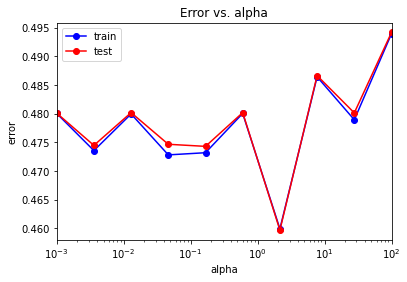

In [ ]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

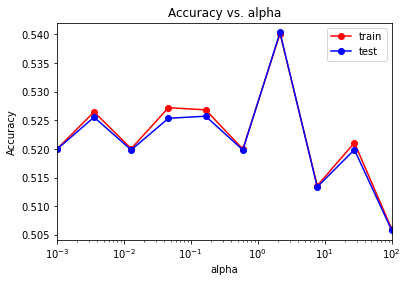

In [ ]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()
pass

Минимальное значение ошибки

In [ ]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.45987215655465485 0.45965461090161125


Оптимальное значение alpha:

In [ ]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[2.15443469]


In [ ]:
mlp_model = MLPClassifier(alpha = 2.15443469, hidden_layer_sizes = (80,), 
                              solver = 'lbfgs', activation = 'relu', max_iter=1000, random_state = 42)

In [ ]:
%%time
mlp_model.fit(X_train, y_train)

CPU times: user 13min 19s, sys: 5min 24s, total: 18min 44s
Wall time: 9min 37s


MLPClassifier(alpha=2.15443469, hidden_layer_sizes=(80,), max_iter=1000,
              random_state=42, solver='lbfgs')

In [ ]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [ ]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.4154483448201978 0.41776654096674665


# Матрица рассогласования и другие метрики качества

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[ 793   10  254   30   17   39   11    5    1]
 [  27 3681   20 1054  115   84  265  208  747]
 [ 100   36  187   24    1   13    4    3    7]
 [  92  866   38 2980  525  306 1037  876   66]
 [ 123  221    6  983 7656  722 1365  478    9]
 [ 131   65    4  286  165 4682  556  214    6]
 [  59  214    3 1576  741 1373 5332 1710    6]
 [   6   68    3  327  223  211  591 1417    9]
 [   1  118    9   28    1    3    2    1  446]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.68      0.60      0.64      1332
           2       0.59      0.70      0.64      5279
           3       0.50      0.36      0.42       524
           4       0.44      0.41      0.42      7288
           5       0.66      0.81      0.73      9444
           6       0.77      0.63      0.69      7433
           7       0.48      0.58      0.53      9163
           8       0.50      0.29      0.36      4912
           9       0.73      0.34      0.47      1297

    accuracy                           0.58     46672
   macro avg       0.60      0.52      0.54     46672
weighted avg       0.58      0.58      0.57     46672

